In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
jobs = pd.read_csv('fake_job_postings.csv')
jobs.fillna(' ', inplace = True)
jobs['text'] = jobs['title'] + ' ' + jobs['location'] + ' ' + jobs['department'] + ' ' + jobs['company_profile'] + ' ' + jobs['description'] + ' ' + jobs['requirements'] + ' ' + jobs['benefits'] + ' ' + jobs['employment_type'] + ' ' + jobs['employment_type'] + ' ' + jobs['required_education'] + ' ' + jobs['required_experience'] + ' ' + jobs['industry'] + ' ' + jobs['function']
jobs.drop(['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_experience', 'required_education', 'industry', 'function'], axis = 1, inplace = True)
jobs.drop(['salary_range', 'telecommuting', 'has_company_logo', 'has_questions'], axis = 1, inplace = True)
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
corpus = []
for i in range(len(jobs)):
    #Remove HTML Tags
    job_posting = re.sub(r"http\S+", ' ', jobs['text'][i])    
    #job_posting = re.sub(r'https?:\/\/\S*', '', jobs['text'][i], flags=re.MULTILINE)
    
    #Remove Punctuation Marks and Special Symbols
    job_posting = re.sub('[^a-zA-Z0-9]', ' ', jobs['text'][i])
    
    #Lowercase
    job_posting = job_posting.lower()
    
    #Create a list of strings using string.split() method
    job_posting = job_posting.split()
    
    # Prefer Lemmatization over Stemming
    #job_posting = [ps.stem(word) for word in job_posting if not word in stopwords.words('english')]
    job_posting = [wl.lemmatize(word, pos='v') for word in job_posting if not word in stopwords.words('english')]    
    job_posting = ' '.join(job_posting)
    corpus.append(job_posting)
    print(i, end = ' ')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
jobs = pd.read_csv('fake_job_postings.csv')
jobs

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


<AxesSubplot:>

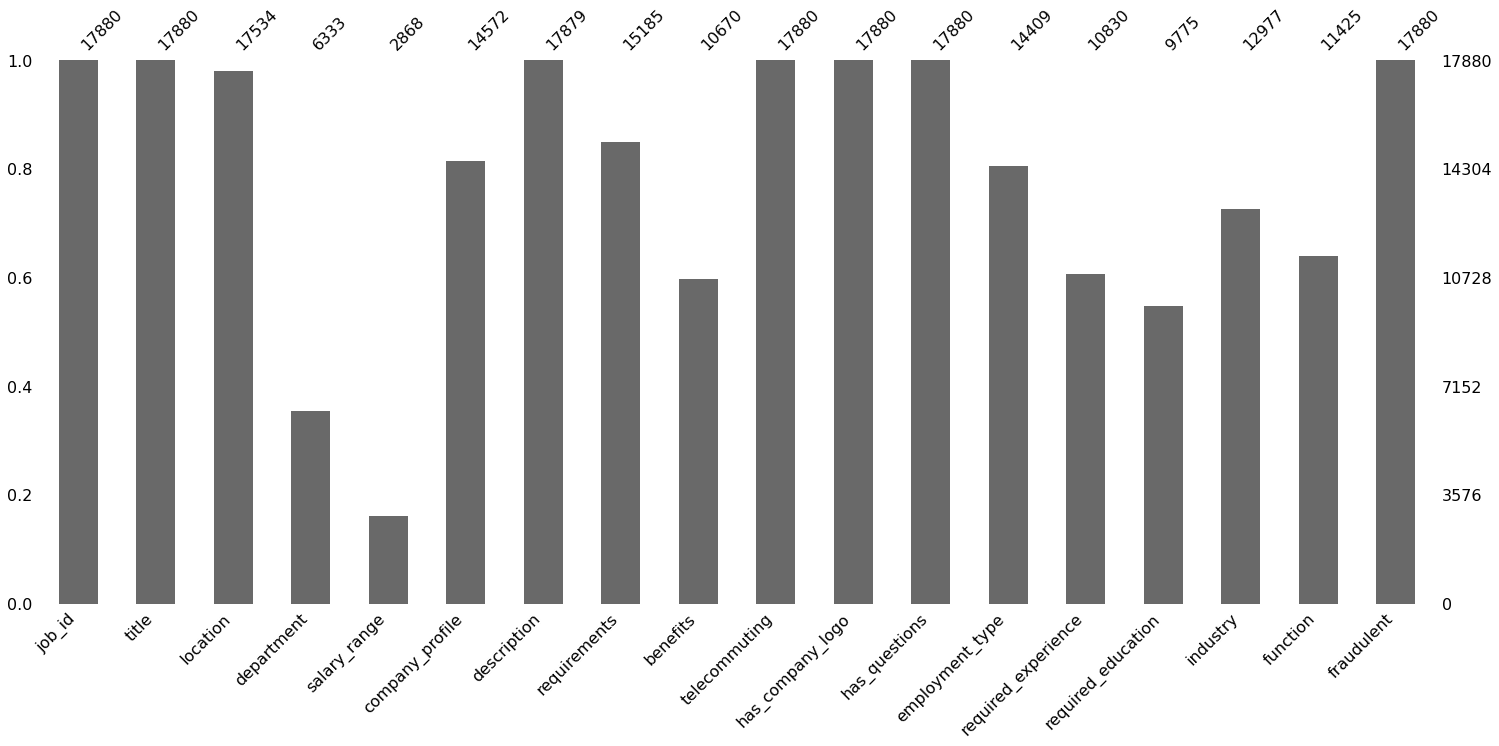

In [3]:
import missingno
missingno.bar(jobs)

<AxesSubplot:>

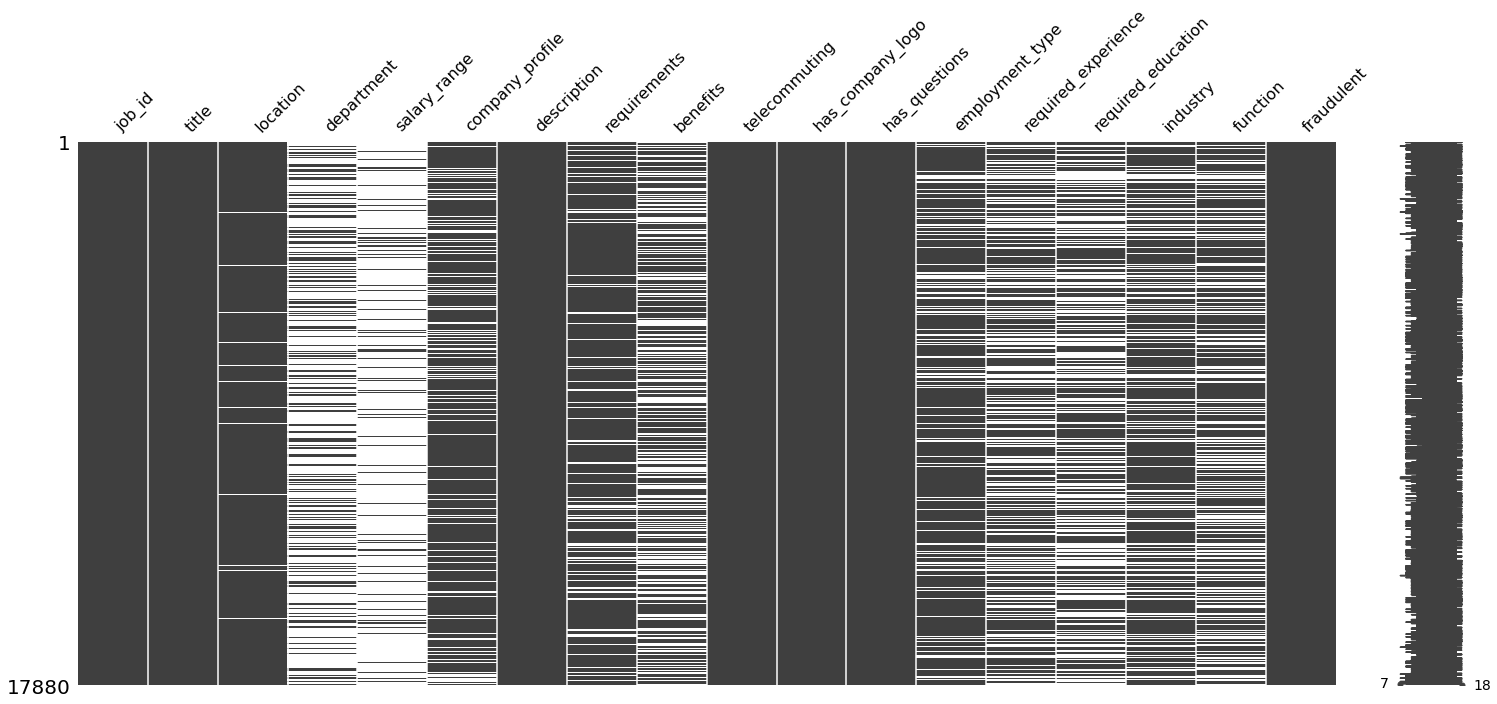

In [4]:
missingno.matrix(jobs)

In [5]:
jobs.fillna(' ', inplace = True)
jobs

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,,0
17878,17879,Graphic Designer,"NG, LA, Lagos",,,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [6]:
jobs['text'] = jobs['title'] + ' ' + jobs['location'] + ' ' + jobs['department'] + ' ' + jobs['company_profile'] + ' ' + jobs['description'] + ' ' + jobs['requirements'] + ' ' + jobs['benefits'] + ' ' + jobs['employment_type'] + ' ' + jobs['employment_type'] + ' ' + jobs['required_education'] + ' ' + jobs['required_experience'] + ' ' + jobs['industry'] + ' ' + jobs['function']
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern US, NY, New York Marketing We..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [7]:
jobs.drop(['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_experience', 'required_education', 'industry', 'function'], axis = 1, inplace = True)
jobs

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,text
0,1,,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,2,,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...,...,...,...,...,...
17875,17876,,0,1,1,0,"Account Director - Distribution CA, ON, Toron..."
17876,17877,,0,1,1,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,17878,,0,0,0,0,Project Cost Control Staff Engineer - Cost Con...
17878,17879,,0,0,1,0,"Graphic Designer NG, LA, Lagos Nemsia Stud..."


In [8]:
jobs.drop(['salary_range', 'telecommuting', 'has_company_logo', 'has_questions'], axis = 1, inplace = True)
jobs

,job_id,fraudulent,text
0,1,0,"Marketing Intern US, NY, New York Marketing We..."
1,2,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...,...
17875,17876,0,"Account Director - Distribution CA, ON, Toron..."
17876,17877,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,17878,0,Project Cost Control Staff Engineer - Cost Con...
17878,17879,0,"Graphic Designer NG, LA, Lagos Nemsia Stud..."


In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

In [10]:
corpus = []
for i in range(len(jobs)):
    #Remove Hyperlinks
    job_posting = re.sub(r"http\S+", ' ', jobs['text'][i])    
    job_posting = re.sub(r'https?:\/\/\S*', '', jobs['text'][i], flags=re.MULTILINE)
    
    #Remove Punctuation Marks and Special Symbols
    job_posting = re.sub('[^a-zA-Z0-9]', ' ', jobs['text'][i])
    
    #Lowercase
    job_posting = job_posting.lower()
    
    #Create a list of strings using string.split() method
    job_posting = job_posting.split()
    
    # Prefer Lemmatization over Stemming
    #job_posting = [ps.stem(word) for word in job_posting if not word in stopwords.words('english')]
    job_posting = [wl.lemmatize(word, pos='v') for word in job_posting if not word in stopwords.words('english')]    
    job_posting = ' '.join(job_posting)
    corpus.append(job_posting)
    print(i, end = ' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 

KeyboardInterrupt: 

In [ ]:
corpus

In [ ]:
jobs['processed_text'] = corpus
jobs

In [ ]:
jobs.to_csv('Processed_Text.csv', index = False)

In [11]:
jobs = pd.read_csv('Processed_Text.csv')
jobs

,job_id,fraudulent,text,processed_text
0,1,0,"Marketing Intern US, NY, New York Marketing We...",market intern us ny new york market food52 cre...
1,2,0,"Customer Service - Cloud Video Production NZ, ...",customer service cloud video production nz auc...
2,3,0,"Commissioning Machinery Assistant (CMA) US, IA...",commission machinery assistant cma us ia wever...
3,4,0,"Account Executive - Washington DC US, DC, Wash...",account executive washington dc us dc washingt...
4,5,0,"Bill Review Manager US, FL, Fort Worth SpotS...",bill review manager us fl fort worth spotsourc...
...,...,...,...,...
17875,17876,0,"Account Director - Distribution CA, ON, Toron...",account director distribution ca toronto sales...
17876,17877,0,"Payroll Accountant US, PA, Philadelphia Accoun...",payroll accountant us pa philadelphia account ...
17877,17878,0,Project Cost Control Staff Engineer - Cost Con...,project cost control staff engineer cost contr...
17878,17879,0,"Graphic Designer NG, LA, Lagos Nemsia Stud...",graphic designer ng la lagos nemsia studios lo...


In [12]:
corpus = list(jobs['processed_text'])
#corpus

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(corpus)

In [14]:
X_cv.shape

(17880, 96449)

In [15]:
y = jobs['fraudulent']

In [16]:
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size = 0.2, random_state = 0)

In [19]:
print(X_train_cv.shape)
print(y_train_cv.shape)
print(X_test_cv.shape)
print(y_test_cv.shape)

(14304, 96449)
(14304,)
(3576, 96449)
(3576,)


In [17]:
from sklearn.linear_model import LogisticRegression
model_lr_cv = LogisticRegression(max_iter = 10000)
model_lr_cv.fit(X_train_cv, y_train_cv)
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [ ]:
# ConvergenceWarning: lbfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

# If you get the above warning, then increase maximum iterations. Try out --> max_iter = 10000
# model_ls = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', max_iter = 10000)

In [20]:
from sklearn.metrics import accuracy_score
print ("Accuracy using Count Vectorizer and Logistic Regression: ", accuracy_score(y_test_cv, y_pred_lr_cv))

Accuracy using Count Vectorizer and Logistic Regression:  0.9837807606263982


In [21]:
from sklearn.svm import SVC
model_svm_cv = SVC(kernel='rbf')
model_svm_cv.fit(X_train_cv, y_train_cv)
y_pred_svm_cv = model_svm_cv.predict(X_test_cv)

In [22]:
from sklearn.metrics import accuracy_score
print ("Accuracy using Count Vectorizer and Support Vector Machine: ", accuracy_score(y_test_cv, y_pred_svm_cv))

Accuracy using Count Vectorizer and Support Vector Machine:  0.9821029082774049


In [23]:
from sklearn.naive_bayes import MultinomialNB
model_mnb_cv = MultinomialNB()
model_mnb_cv.fit(X_train_cv, y_train_cv)
y_pred_mnb_cv = model_mnb_cv.predict(X_test_cv)

In [24]:
from sklearn.metrics import accuracy_score
print ("Accuracy using Count Vectorizer and Multinomial Naive Bayes: ", accuracy_score(y_test_cv, y_pred_mnb_cv))

Accuracy using Count Vectorizer and Multinomial Naive Bayes:  0.9720357941834452


In [25]:
from sklearn.neural_network import MLPClassifier
model_mlp_cv = MLPClassifier(activation = 'logistic', hidden_layer_sizes = [10, 5, 2])
model_mlp_cv.fit(X_train_cv, y_train_cv)
y_pred_mlp_cv = model_mlp_cv.predict(X_test_cv)

In [26]:
from sklearn.metrics import accuracy_score
print ("Accuracy using Count Vectorizer and Multilayer Perceptron: ", accuracy_score(y_test_cv, y_pred_mlp_cv))

Accuracy using Count Vectorizer and Multilayer Perceptron:  0.979586129753915


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X_tv = tv.fit_transform(corpus)

In [ ]:
X_tv.shape

In [ ]:
y = jobs['fraudulent']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr_tv = LogisticRegression()
model_lr_tv.fit(X_train_tv, y_train_tv)
y_pred_lr_tv = model_lr_tv.predict(X_test_tv)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy using TFIDF Vectorizer and Logistic Regression: ", accuracy_score(y_test_tv, y_pred_lr_tv))

In [ ]:
from sklearn.svm import SVC
model_svm_tv = SVC(kernel='rbf')
model_svm_tv.fit(X_train_tv, y_train_tv)
y_pred_svm_tv = model_svm_cv.predict(X_test_tv)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy using TFIDF Vectorizer and Support Vector Machine: ", accuracy_score(y_test_tv, y_pred_svm_tv))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_mnb_tv = MultinomialNB()
model_mnb_tv.fit(X_train_tv, y_train_tv)
y_pred_mnb_tv = model_mnb_tv.predict(X_test_tv)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy using Count Vectorizer and Multinomial Naive Bayes: ", accuracy_score(y_test_tv, y_pred_mnb_tv))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_tv, y_pred_mnb_tv)

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(jobs.processed_text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_test_tv, y_pred_mnb_tv), cmap = "Blues", annot = True, fmt = '')

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix(y_test_tv, y_pred_mnb_tv).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test_tv, y_pred_mnb_tv).flatten()/np.sum(confusion_matrix(y_test_tv, y_pred_mnb_tv))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix(y_test_tv, y_pred_mnb_tv), annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()